# Loading Audio files

In [1]:
# directory path for VOiCES  dataset
dat_dir = 'add/yourDirectory/path/VOiCES'
# directory path for VOiCES reference files
refs_dir = 'add/yourDirectory/path/VOiCES_refs/'

In [1]:
import os 
import librosa
from glob import glob
import librosa.display 
import matplotlib.pyplot as plt
import random
import IPython.display as ipd
import fnmatch
import itertools
import numpy as np
from types import *
import pandas as pd

%matplotlib inline

In [2]:
'''
Input filename path, output transcript, assumes df built from .refs file is loaded 
'''
def get_transcript(filename, df):
    file = filename[: -4]
    return df[df.fileName == file].trnscrpt.tolist()[0][1:]
   

## Exploring the Data

### Reference files

In [35]:
os.chdir(refs_dir)

Speaker gender and LibriSpeech dataset

In [4]:
spkGendr = pd.read_csv('Lab41-SRI-VOiCES-speaker-gender-dataset_SUBSET.csv')
spkGendr.head()

,Speaker,Gender,DataSet
0,5126,M,train-clean-360
1,3549,F,train-clean-360
2,4331,F,train-clean-360
3,196,M,train-clean-100
4,2289,M,train-clean-100


In [5]:
print('Total number of speakers: ', len(spkGendr))
print('Number of females:', spkGendr.Gender[spkGendr.Gender == 'F'].count())
print('Number of males:', spkGendr.Gender[spkGendr.Gender == 'F'].count())

Total number of speakers:  104
Number of females: 48
Number of males: 48


In [6]:
trascript = pd.read_csv('Lab41-SRI-VOiCES_ref_SUBSET.csv')

In [7]:
trascript.head(10)

,fileName,trnscrpt
0,Lab41-SRI-VOiCES-rm1-musi-sp5126-ch036956-sg00...,a wink from mister lord must have been intend...
1,Lab41-SRI-VOiCES-rm1-none-sp3549-ch173591-sg00...,but a dull exile in a petty fort by a hot and...
2,Lab41-SRI-VOiCES-rm2-babb-sp4331-ch057179-sg00...,that sir jeffrey had a wife and family she wa...
3,Lab41-SRI-VOiCES-rm2-tele-sp0196-ch122152-sg00...,stop the engines instead of making a row abou...
4,Lab41-SRI-VOiCES-rm2-musi-sp2289-ch152257-sg00...,trib o'ni an to collect and simplify the prin...
5,Lab41-SRI-VOiCES-rm1-tele-sp0196-ch122159-sg00...,he pronounced with a convulsive effort whose ...
6,Lab41-SRI-VOiCES-rm1-babb-sp6241-ch061943-sg00...,on the eleventh day we sighted cape portland ...
7,Lab41-SRI-VOiCES-rm1-none-sp4014-ch186179-sg00...,it was that same day that the three boys from...
8,Lab41-SRI-VOiCES-rm1-babb-sp1536-ch141791-sg00...,as soon as londonderry had fallen and it was ...
9,Lab41-SRI-VOiCES-rm2-tele-sp1874-ch165701-sg00...,but also recited doggerel satire of his own c...


### Sample data

In [9]:
os.chdir(dat_dir)

In [10]:
files = os.listdir()

Let's choose a file at random

In [11]:
filename = random.choice(files)
print(filename)

Lab41-SRI-VOiCES-rm1-tele-sp3645-ch186230-sg0018-mc03-stu-mid-dg090.wav


In [12]:
x, sr = librosa.load(filename)

In [13]:
# play audio file
ipd.Audio(filename)

In [14]:
print('Transcript:')
print(get_transcript(filename, trascript))

Transcript:
and in her voluable irish way berated her aunt until poor phibbs stood aghast at such temerity and even mister watson who arrived to enquire after his client and friend was filled with amazement he cast a significant look at miss merrick who answered it in her usual emphatic way


Let's plot wav file

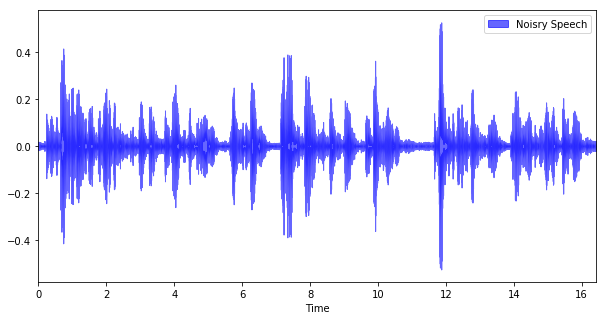

In [15]:
plt.figure(figsize = (10,5))
librosa.display.waveplot(x, sr, color = 'blue', alpha = 0.6, label = 'Noisry Speech')
plt.legend()

Display spectrogram

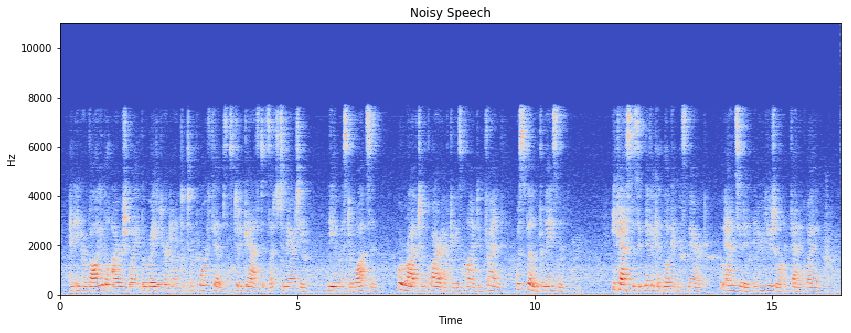

In [16]:
# noisy speech
sp_ft = librosa.stft(x)
sp_db = librosa.amplitude_to_db(abs(sp_ft))
plt.figure(figsize=(14, 5))
plt.title('Noisy Speech')
librosa.display.specshow(sp_db, sr=sr, x_axis='time', y_axis='hz')